In [2]:
import pandas as pd
from langdetect import detect
from indicnlp.tokenize import indic_tokenize

In [3]:
def identify_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

In [4]:
def preprocess_hindi(text):
    if isinstance(text, str):
        tokens = indic_tokenize.trivial_tokenize(text, lang='hi')
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        return ''

def preprocess_bengali(text):
    if isinstance(text, str):
        tokens = indic_tokenize.trivial_tokenize(text, lang='bn')
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        return ''

In [5]:
file_path = 'tweets.xlsx'
df = pd.read_excel(file_path)

In [6]:
df.head()

,Tweets,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Reality of Hindi Media sorry godi Media. \n#Ma...,NaN,NaN,NaN
1,"यह हक़ सिर्फ, झूठ को है कि \nवह ज़ोर से बोले, ...",NaN,NaN,NaN
2,#Kurukshetra | राहुल गांधी कहते हैं कि हिंदू ट...,NaN,NaN,NaN
3,#ManipurVoilence के बीच कुकी महिलाओं को निर्वस...,NaN,NaN,NaN
4,#Kurukshetra | I-N-D-I-A से कोई इंडिया नहीं हो...,NaN,NaN,NaN


In [7]:
df.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis = 1, inplace = True)

In [8]:
df.head

<bound method NDFrame.head of                                                 Tweets
0    Reality of Hindi Media sorry godi Media. \n#Ma...
1    यह हक़ सिर्फ, झूठ को है कि \nवह ज़ोर से बोले, ...
2    #Kurukshetra | राहुल गांधी कहते हैं कि हिंदू ट...
3    #ManipurVoilence के बीच कुकी महिलाओं को निर्वस...
4    #Kurukshetra | I-N-D-I-A से कोई इंडिया नहीं हो...
..                                                 ...
300  আলিবাবা ৪০ চোর...?? 'আশারাম'-এর চেলা নিজের সংগ...
301  ফেসবুক পোস্টে এবার বিস্ফোরক তৃণমূল কংগ্রেস এর ...
302  মণিপুর ইস্যু নিয়ে এবং বাংলাকে বঞ্চনার অভিযোগে...
303   মণিপুরে দাঁড়িয়ে বিজেপি সরকারের বিরোধিতা করা...
304  দেশের গনতন্ত্র রক্ষার স্বার্থে আগামী লোকসভা ২০...

[305 rows x 1 columns]>

In [9]:
df['Language'] = df['Tweets'].apply(identify_language)

In [10]:
df.Language

0      en
1      hi
2      hi
3      hi
4      hi
       ..
300    bn
301    bn
302    bn
303    bn
304    bn
Name: Language, Length: 305, dtype: object

In [11]:
df_hindi = df[df['Language'] == 'hi'].copy()  # Use .copy() to avoid the SettingWithCopyWarning
df_bengali = df[df['Language'] == 'bn'].copy() 

In [12]:
len(df_hindi)

150

In [13]:
len(df_bengali)

146

In [14]:
df_hindi.head

<bound method NDFrame.head of                                                 Tweets Language
1    यह हक़ सिर्फ, झूठ को है कि \nवह ज़ोर से बोले, ...       hi
2    #Kurukshetra | राहुल गांधी कहते हैं कि हिंदू ट...       hi
3    #ManipurVoilence के बीच कुकी महिलाओं को निर्वस...       hi
4    #Kurukshetra | I-N-D-I-A से कोई इंडिया नहीं हो...       hi
5    पढ़ें देशबंधु का आलेख- वर्षा भम्भाणी मिर्जा़ म...       hi
..                                                 ...      ...
191  SKM की बैठक के बाद गृह मंत्रालय और कृषि मंत्रा...       hi
192  केंद्र का किसानों को नया प्रस्ताव, आंदोलन के द...       hi
193  #AwaazStory | पंजाब में #Telecom टावर को नुकसा...       hi
194  मिलिए सांसद से-श्री धर्मवीर सिंह (Part-3) - सा...       hi
195  देशभर के किसान संगठनों ने कृषि मंत्री श्री नरे...       hi

[150 rows x 2 columns]>

In [15]:
df_hindi['Preprocessed_Hindi_Text'] = df_hindi['Tweets'].apply(lambda x: preprocess_hindi(x))
df_bengali['Preprocessed_Bengali_Text'] = df_bengali['Tweets'].apply(lambda x: preprocess_bengali(x))

In [16]:
df_hindi.drop('Tweets', axis = 1, inplace = True)
df_bengali.drop('Tweets', axis = 1, inplace = True)


In [17]:
print(df_hindi.isna().sum())

Language                   0
Preprocessed_Hindi_Text    0
dtype: int64


In [18]:
print(df_bengali.isna().sum())

Language                     0
Preprocessed_Bengali_Text    0
dtype: int64


In [19]:
print(df_bengali.duplicated().sum())
df_bengali.drop_duplicates(inplace=True)


15


In [20]:
print(df_hindi.duplicated().sum())
df_hindi.drop_duplicates(inplace=True)

1


In [21]:
import re
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = ' '.join(text.split())
        return text
    else:
        return ''

In [22]:
df_hindi['Preprocessed_Hindi_Text'] = df_hindi['Preprocessed_Hindi_Text'].apply(lambda x: clean_text(x))
df_bengali['Preprocessed_Bengali_Text'] = df_bengali['Preprocessed_Bengali_Text'].apply(lambda x: clean_text(x))

In [23]:
df_bengali.head()

,Language,Preprocessed_Bengali_Text
49,bn,Manipur Violence ঘণ ছডযছ মণপর ভলবসর দকন খলত হব...
50,bn,মণপরর দঙগ সমপরক ভল ভঙ দলন অসওযলড গরসযস Manipur...
51,bn,মণপর অশনত নয মখ খললন মমবইযর করডনল অসওযলড গরসযস...
52,bn,মণপরর ঘটনর তদনত সবআই নরদশ সবরষটর মনতরকর Manipu...
53,bn,Manipur Violence মহলদর উপর অতযচরর ঘটন সহয কর হ...


In [24]:
df_hindi.head()

,Language,Preprocessed_Hindi_Text
1,hi,यह हक सरफ झठ क ह क वह जर स बल और वशषट बन रह कव...
2,hi,Kurukshetra रहल गध कहत ह क हद टररजम खतरनक ह कग...
3,hi,ManipurVoilence क बच कक महलओ क नरवसतर कर सडक प...
4,hi,Kurukshetra I N D I A स कई इडय नह ह जत कगरस पर...
5,hi,पढ दशबध क आलख वरष भमभण मरज मणपर क भरस जत यह अव...


In [25]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
analyzer = SentimentIntensityAnalyzer()


In [27]:
def get_sentiment_score(text):
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score['compound']

In [28]:
df_bengali['Sentiment_Score'] = df_bengali['Preprocessed_Bengali_Text'].apply(get_sentiment_score)
df_hindi['Sentiment_Score'] = df_hindi['Preprocessed_Hindi_Text'].apply(get_sentiment_score)

In [29]:
df_bengali['Sentiment_Score'].unique()

array([-0.9062,  0.    , -0.8481, -0.7783, -0.7003, -0.25  , -0.7906,
       -0.9371, -0.296 ,  0.3182,  0.4019, -0.5574, -0.8957,  0.3612,
       -0.5994,  0.4767, -0.2263])

In [30]:
df_hindi['Sentiment_Score'].unique()

array([ 0.    ,  0.8316,  0.4939,  0.5267,  0.2732, -0.6249, -0.4215,
        0.5574, -0.25  ])

In [31]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [32]:
df_hindi

,Language,Preprocessed_Hindi_Text,Sentiment_Score
1,hi,यह हक सरफ झठ क ह क वह जर स बल और वशषट बन रह कव...,0.0000
2,hi,Kurukshetra रहल गध कहत ह क हद टररजम खतरनक ह कग...,0.0000
3,hi,ManipurVoilence क बच कक महलओ क नरवसतर कर सडक प...,0.0000
4,hi,Kurukshetra I N D I A स कई इडय नह ह जत कगरस पर...,0.0000
5,hi,पढ दशबध क आलख वरष भमभण मरज मणपर क भरस जत यह अव...,0.8316
6,hi,INDIA क 26 सदसयय परतनधमडल कल जएग मणपर कक मतई स...,0.0000
7,hi,मणपर पर ततकल चरच पर अड वपकष हगम क बच रजयसभ समव...,0.0000
8,hi,मणपर ममल म सदन म परधनमतर क बयन क लकर ससद क दन ...,0.0000
9,hi,मणपर क पडत महलओ क परवर स मल DCW अधयकष सवत मलवल...,0.0000
10,hi,Parliament Monsoon Session मणपर क लकर सदन म हग...,0.0000


In [33]:
df_bengali

,Language,Preprocessed_Bengali_Text,Sentiment_Score
49,bn,Manipur Violence ঘণ ছডযছ মণপর ভলবসর দকন খলত হব...,-0.9062
50,bn,মণপরর দঙগ সমপরক ভল ভঙ দলন অসওযলড গরসযস Manipur...,0.0000
51,bn,মণপর অশনত নয মখ খললন মমবইযর করডনল অসওযলড গরসযস...,0.0000
52,bn,মণপরর ঘটনর তদনত সবআই নরদশ সবরষটর মনতরকর Manipu...,0.0000
53,bn,Manipur Violence মহলদর উপর অতযচরর ঘটন সহয কর হ...,-0.8481
54,bn,হনদ বনম খরষটনদর লডই নয ManipurVoilence Manipur...,0.0000
55,bn,Manipur Violence করমশ সবভবক হচছ মণপর মতযন ৩৫ হ...,-0.7783
56,bn,Manipur Viral Video মণপরর ঘটনয ভয পযছ চমক উঠছ ...,-0.7003
57,bn,মণপর ইসযত সরব পরদশ কগরস রজভবন অভযন congress Ma...,-0.2500
58,bn,রজয সরকরক শনত ফরত সকরয হত বলছ জতয মনবধকর কমশন ...,0.0000


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
def map_to_sentiment_label(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

In [36]:
df_hindi['Sentiment_Label'] = df_hindi['Sentiment_Score'].apply(map_to_sentiment_label)

In [37]:
df_bengali['Sentiment_Label'] = df_bengali['Sentiment_Score'].apply(map_to_sentiment_label)

<AxesSubplot:xlabel='Sentiment_Label', ylabel='count'>

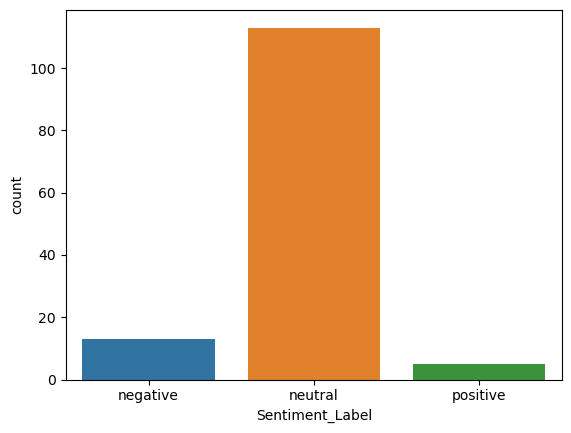

In [38]:
sns.countplot(data = df_bengali, x = 'Sentiment_Label')

<AxesSubplot:xlabel='Sentiment_Label', ylabel='count'>

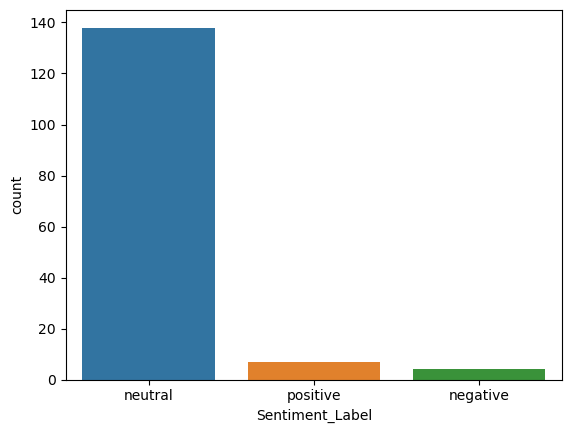

In [39]:
sns.countplot(data = df_hindi, x = 'Sentiment_Label')

In [42]:
df_hindi

,Language,Preprocessed_Hindi_Text,Sentiment_Score,Sentiment_Label
1,hi,यह हक सरफ झठ क ह क वह जर स बल और वशषट बन रह कव...,0.0000,neutral
2,hi,Kurukshetra रहल गध कहत ह क हद टररजम खतरनक ह कग...,0.0000,neutral
3,hi,ManipurVoilence क बच कक महलओ क नरवसतर कर सडक प...,0.0000,neutral
4,hi,Kurukshetra I N D I A स कई इडय नह ह जत कगरस पर...,0.0000,neutral
5,hi,पढ दशबध क आलख वरष भमभण मरज मणपर क भरस जत यह अव...,0.8316,positive
6,hi,INDIA क 26 सदसयय परतनधमडल कल जएग मणपर कक मतई स...,0.0000,neutral
7,hi,मणपर पर ततकल चरच पर अड वपकष हगम क बच रजयसभ समव...,0.0000,neutral
8,hi,मणपर ममल म सदन म परधनमतर क बयन क लकर ससद क दन ...,0.0000,neutral
9,hi,मणपर क पडत महलओ क परवर स मल DCW अधयकष सवत मलवल...,0.0000,neutral
10,hi,Parliament Monsoon Session मणपर क लकर सदन म हग...,0.0000,neutral


In [43]:
df_hindi_final = df_hindi.drop(['Sentiment_Score', 'Language'], axis = 1)

In [44]:
df_bengali

,Language,Preprocessed_Bengali_Text,Sentiment_Score,Sentiment_Label
49,bn,Manipur Violence ঘণ ছডযছ মণপর ভলবসর দকন খলত হব...,-0.9062,negative
50,bn,মণপরর দঙগ সমপরক ভল ভঙ দলন অসওযলড গরসযস Manipur...,0.0000,neutral
51,bn,মণপর অশনত নয মখ খললন মমবইযর করডনল অসওযলড গরসযস...,0.0000,neutral
52,bn,মণপরর ঘটনর তদনত সবআই নরদশ সবরষটর মনতরকর Manipu...,0.0000,neutral
53,bn,Manipur Violence মহলদর উপর অতযচরর ঘটন সহয কর হ...,-0.8481,negative
54,bn,হনদ বনম খরষটনদর লডই নয ManipurVoilence Manipur...,0.0000,neutral
55,bn,Manipur Violence করমশ সবভবক হচছ মণপর মতযন ৩৫ হ...,-0.7783,negative
56,bn,Manipur Viral Video মণপরর ঘটনয ভয পযছ চমক উঠছ ...,-0.7003,negative
57,bn,মণপর ইসযত সরব পরদশ কগরস রজভবন অভযন congress Ma...,-0.2500,negative
58,bn,রজয সরকরক শনত ফরত সকরয হত বলছ জতয মনবধকর কমশন ...,0.0000,neutral


In [45]:
df_bengali_final = df_bengali.drop(['Sentiment_Score', 'Language'], axis = 1)

In [47]:
df_hindi_final.rename(columns = {'Preprocessed_Hindi_Text' : 'tweets'}, inplace = True)

In [48]:
df_bengali_final.rename(columns = {'Preprocessed_Bengali_Text' : 'tweets'}, inplace = True)

In [ ]:
df_final = pd.concat()